In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('dietary_patterns_cancer.csv')

In [4]:
data.head()

,Fruits and vegetables,Whole grains,Legumes,Nuts and seeds,Fish and poultry,Processed meats,Red meat,Refined grains,Sugary drinks,High-fat dairy,Smoking,Prostate cancer
0,1,1,2,2,1,4,5,4,4,5,4,yes
1,1,2,2,2,1,5,5,4,5,5,4,yes
2,5,2,2,1,2,4,1,5,4,3,5,no
3,4,3,1,3,1,2,3,4,1,1,1,no
4,2,1,2,2,2,5,5,4,4,5,3,yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Fruits and vegetables  2096 non-null   int64 
 1   Whole grains           2096 non-null   int64 
 2   Legumes                2096 non-null   int64 
 3   Nuts and seeds         2096 non-null   int64 
 4   Fish and poultry       2096 non-null   int64 
 5   Processed meats        2096 non-null   int64 
 6   Red meat               2096 non-null   int64 
 7   Refined grains         2096 non-null   int64 
 8   Sugary drinks          2096 non-null   int64 
 9   High-fat dairy         2096 non-null   int64 
 10  Smoking                2096 non-null   int64 
 11  Prostate cancer        2096 non-null   object
dtypes: int64(11), object(1)
memory usage: 196.6+ KB


In [6]:
data['Prostate cancer'].value_counts()

Prostate cancer
no     1077
yes    1019
Name: count, dtype: int64

In [7]:
X = data.drop(['Prostate cancer'], axis=1)
y = data['Prostate cancer']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   Fruits and vegetables  Whole grains  Legumes  Nuts and seeds  \
0                      1             1        2               2   
1                      1             2        2               2   
2                      5             2        2               1   
3                      4             3        1               3   
4                      2             1        2               2   

   Fish and poultry  Processed meats  Red meat  Refined grains  Sugary drinks  \
0                 1                4         5               4              4   
1                 1                5         5               4              5   
2                 2                4         1               5              4   
3                 1                2         3               4              1   
4                 2                5         5               4              4   

   High-fat dairy  Smoking  
0               5        4  
1               5        4  
2               3      

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1257, 11)
(1257,)
(839, 11)
(839,)


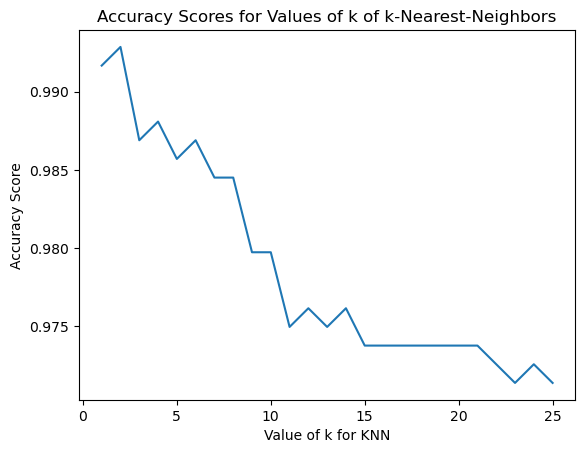

In [9]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()



In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[1, 2, 1, 2, 1, 5, 4, 4, 3, 4, 4]])

array(['yes'], dtype=object)